In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import seaborn as sns
import numpy as np
sns.set(style='darkgrid')

# <center> Analyse Exploratoire </center>

In [2]:
# Importation du fichier£
df=pd.read_csv('CSV_TMP/BBD60.csv', sep=',',dtype='object')

In [3]:
df

,Unnamed: 0,Liens,EAN,Titre,Genre(s),Resume,Image,Rating,Auteur_1,Dessinateur_1,...,Critique_3,L4,N4,Critique_4,L5,N5,Critique_5,L6,N6,Critique_6
0,0,1,9782203001022,"Les Aventures de Tintin, tome 03 : Tintin en A...","[' journaliste ', ' Reporters ', ' ligne cla...","['\n\t\t\t\t\t\t\t\t\t\tDans ""Tintin en Amériq...",/couv/5953_765523.jpeg,3.55,Hergé,NaN,...,"Durant son aventure au Congo, Tintin a été con...",Crazynath,NaN,"Apres l'Afrique, et le Congo plus précisément,...",dedanso,NaN,"J'aime bien Tintin et, même si cet album-ci n'...",NaN,NaN,NaN
1,1,2,9782203001107,"Les Aventures de Tintin, tome 11 : Le Secret d...",[' ligne claire '],"[""\n\t\t\t\t\t\t\t\t\t\tDans cette aventure, T...",https://images-na.ssl-images-amazon.com/images...,4.15,Hergé,NaN,...,"Une des aventures de Tintin, le fameux reporte...",pascontent,NaN,Nous allons nous intéresser plus particulièrem...,Myriam3,NaN,"Avec sa suite, le Trésor de Rackham le Rouge, ...",NaN,NaN,NaN
2,2,3,9782203001169,"Les Aventures de Tintin, tome 17 : On a marché...","[' exploration ', ' journaliste ', ' belge ']",['\n\t\t\t\t\t\t\t\t\t\tLa fusée a décollé de ...,/couv/bm_5953_766309.jpg,4.12,Hergé,NaN,...,"Fantastiquement parlant , le plus éblouissant,...",rabanne,NaN,J'attendais patiemment le moment où j'attribue...,Myriam3,NaN,J'ai beau l'avoir lu et relu depuis mon enfanc...,NaN,NaN,NaN
3,3,4,9782203001053,"Les aventures de Tintin, Tome 6 : L'Oreille ca...",[' franco-belge '],"[""\n\t\t\t\t\t\t\t\t\t\tAfin de récupérer un f...",/couv/bm_5953_766311.jpg,3.85,Hergé,NaN,...,Nombreuses aventures pour Tintin dans cet albu...,Alzie,NaN,Apparu en noir et blanc dans le Petit Vingtièm...,TableRonde,NaN,L'oreille cassée : Mon premier album de Tintin...,NaN,NaN,NaN
4,4,5,9782203001152,"Les aventures de Tintin, tome 16 : Objectif lune",[' science '],"['\n\t\t\t\t\t\t\t\t\t\tDe retour de voyage, T...",/couv/bm_5953_766336.jpg,4.08,Hergé,NaN,...,Je découvre Tintin en 1968 avec « Objectif Lun...,cicou45,NaN,Je crois qu'il s'agit réellement de mon diptyq...,Labandedesayacks,NaN,Voilà à 61 ans je relis mes Tintin !?Hergé est...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202907,202907,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202908,202908,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202909,202909,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202910,202910,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
indexNames = df[( df['EAN'] == '0')].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
indexNames = df[( df['EAN'] == 0)].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
#print(df)

In [5]:
# Fonction pour mettre en évidence les NaNs et leur donner un pourcentage
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"     
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)


Your selected dataframe has 28 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
Critique_6,8874,100.0
N6,8874,100.0
N1,8874,100.0
L6,8874,100.0
N2,8874,100.0
N5,8874,100.0
N3,8874,100.0
Dessinateur_1,8874,100.0
N4,8874,100.0
Critique_5,2329,26.2


In [6]:
print('Nombre de titre: ', str(df['Titre'].count()))
print('Avec une critique: ', str(df['Critique_1'].count()))
print('Avec deux critiques: ', str(df['Critique_2'].count()))
print('Avec trois critiques: ', str(df['Critique_3'].count()))
print('Avec quatre critiques: ', str(df['Critique_4'].count()))
print('Avec cinq critiques: ', str(df['Critique_5'].count()))
print('Avec six critiques: ', str(df['Critique_6'].count()))

Nombre de titre:  8874
Avec une critique:  8406
Avec deux critiques:  7907
Avec trois critiques:  7454
Avec quatre critiques:  7024
Avec cinq critiques:  6545
Avec six critiques:  0


### Visualisation des notes

In [7]:
dfgb=(df.groupby("Rating").count())['Titre']

In [8]:
def quartile_1(l):
    return sorted(l)[int(len(l) * .25)]

def median(l):
    return sorted(l)[len(l)/2]

def quartile_3(l):
    return sorted(l)[int(len(l) * .75)]

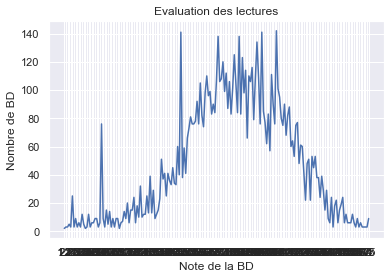

In [10]:
fig, ax = plt.subplots()
plt.plot(dfgb)
ax.set_xlabel('Note de la BD')
ax.set_ylabel('Nombre de BD')
ax.set_title('Evaluation des lectures')
plt.show()
fig.savefig('Images/MoyenneC')

In [11]:
df['Titre']=df['Titre'].astype(str)

In [12]:
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))

### Visualisation des genres

In [13]:
def distr_e(data,col):
    df_distri=pd.DataFrame()
    df_distri["modalite"]=data[col].value_counts().index
    df_distri["effectif1"]=list(data[col].value_counts())
    df_distri["frequence"]=list(df_distri["effectif1"]/df_distri["effectif1"].sum())
    return df_distri

In [14]:
print(distr_e(df,'Genre(s)'))

                                               modalite  effectif1  frequence
0                                 [' bande dessinée  ']        151   0.017016
1                          [' littérature française  ']         55   0.006198
2                                          [' album  ']         47   0.005296
3                                          [' roman  ']         45   0.005071
4                                    [' fantastique  ']         43   0.004846
...                                                 ...        ...        ...
2742                   [' drogue  ', ' ligne claire  ']          1   0.000113
2743  [' journalisme  ', ' journaliste  ', ' ligne c...          1   0.000113
2744  [' album  ', ' récits  ', ' relations humaines...          1   0.000113
2745                         [' deserts  ', ' belge  ']          1   0.000113
2746  [' album  ', ' récits  ', ' historique  ', ' l...          1   0.000113

[2747 rows x 3 columns]


In [15]:
def remove_tags(text) :
    TAG_RE=re.sub(" ", '', str(text))
    return TAG_RE

In [16]:
# On modfie le DataFrame pour que les genres soient des listes et non pas de chaînes de caractères
df['Genre(s)']=df['Genre(s)'].apply(remove_tags)
df['Genre(s)']=df['Genre(s)'].apply(ast.literal_eval)

In [17]:
set_keywords = set()
# On fait une liste de tous les mots clefs (où chaque mot n'apparait qu'une seule fois):
for liste_keywords in df['Genre(s)'].values:   
    if isinstance(liste_keywords, float): continue 
    set_keywords = set_keywords.union(liste_keywords)
#print(set_keywords)

In [18]:
def count_word(data, ref_col, liste): 
    ''' Count the number of occurrences for each keyword
    '''
    
    keyword_count = dict()
    
    for s in liste: keyword_count[s] = 0
        
    for liste_keywords in df[ref_col]:        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): 
            continue
            
        for s in [s for s in liste_keywords if s in liste]: 
            
            if pd.notnull(s):
                keyword_count[s] += 1
    
    # conversion of our dictionary into a list
    keyword_occurences = []
    for k,v in keyword_count.items():
        
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

keyword_occurences, dum = count_word(df, 'Genre(s)', set_keywords)
keyword_occurences[:10]

[['album', 3662],
 ['récits', 1542],
 ['littératurefrançaise', 1331],
 ['littératurejeunesse', 1100],
 ['saga', 883],
 ['aventure', 838],
 ['jeunesse', 777],
 ['france', 680],
 ['fantastique', 654],
 ['suspense', 600]]

/Users/curbiereloic/opt/anaconda3/envs/ComicsIA/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


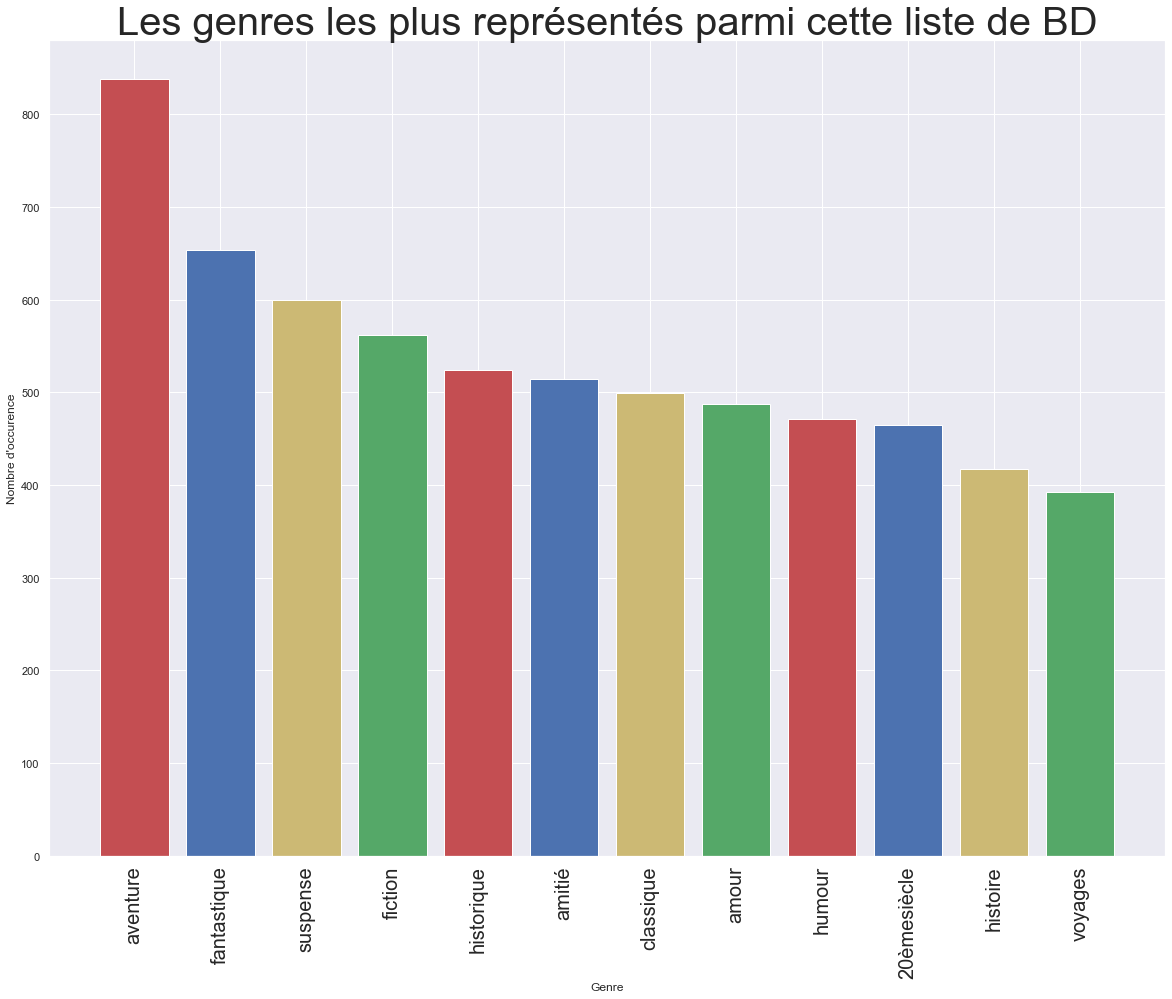

In [19]:
genre_labels = set()
trunc_occurences=[]
# Mes catégories qui n'ont pas d'interêt dans notre cas
lst_categ=['album','récits','roman','saga','romangraphique','bandedessinée','graphisme','jeunesse'
           ,'cycle','famille','scénario','littératurejeunesse','littératurefrançaise','france','belgique','franco-belge','bdjeunesse','bdfranco-belge','littératurefrancophone','enfants',
          'serie','enfance','adaptéaucinéma','littératurebelge']
for s in df['Genre(s)'].values:
    genre_labels = genre_labels.union(set(s))

keyword_occurences, dum = count_word(df, 'Genre(s)', genre_labels)

words = dict()
to = keyword_occurences[0:30]
[trunc_occurences.append(totmp) for totmp in to if (totmp[0] not in lst_categ) ]
for s in trunc_occurences:
    words[s[0]] = s[1]

# Graphic showing the genres most present in the films

fig=plt.figure(figsize=(20, 15))
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
label_x = [i[0] for i in trunc_occurences]
plt.xticks(rotation=90, fontsize = 20)
ax = plt.axes()
ax = ax.set(xlabel="Genre", ylabel="Nombre d'occurence")

plt.bar(label_x, y_axis,color=['r','b','y','g'])
plt.title("Les genres les plus représentés parmi cette liste de BD",fontsize = 40)
plt.show()
fig.savefig('Genres')

### Visualisation de la taille de critiques

In [20]:
def compte_mot(phrase):
    nb_mot=0;lettre_pre=' '
    for lettre in phrase:
        if lettre==' ' and lettre_pre!=' ':
            nb_mot+=1
        else :
            lettre_pre=lettre
    return nb_mot

In [21]:
tab_nbmots=[]
def range_nbmots(compte_mot):
    CX=compte_mot
    if CX>1:#On sauvegarde la valeur si il y a une critique
        tab_nbmots.append(CX)
    return tab_nbmots

In [22]:
# Première critique à 9 et il y a 6 critiques
nb_mots=[]
for idx in range(1,6):
    for critique in df['Critique_' + str(idx)]:
        #print(critique)
        #print(compte_mot(critique))
        #Avec ces print, on vérifie que le comptage est bon
        nb_mots += [range_nbmots(compte_mot(str(critique)))]
            
#print(nb_mots)

In [ ]:
ax=sns.displot(nb_mots)
ax = ax.set(xlabel="Nombre de mots de toutes les critiques d'un ouvrage", ylabel="Nombre d'occurence")
ax.savefig('MotsCritiques')

In [ ]:
maximum=pd.Series(nb_mots).max()
print("Le nombre maximum de mot dans une critique  est ", str(maximum))
minimum=pd.Series(nb_mots).min()
print("Le nombre minium de mot dans une critique  est ", str(minimum)) 
moyenne=int(pd.Series(nb_mots).sum()/len(nb_mots))
print("Le nombre moyen de mot dans une critique  est ", str(moyenne))

In [100]:
# Lister tous les lecteurs
dfl=pd.concat([df['L1'],df['L2'],df['L3'],df['L4'],df['L5']],axis=0)
dfc=pd.concat([df['Critique_1'],df['Critique_2'],df['Critique_3'],df['Critique_4'],df['Critique_5']],axis=0)
dflc=pd.concat([dfl,dfc],axis=1)

In [68]:
# Lecteurs ayant fait le plus de critiques
dfl[0].sort_values(ascending = False)

0        Crazynath
0    GeorgesSmiley
0           Mahpee
0        XanderOne
0          dedanso
dtype: object